# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


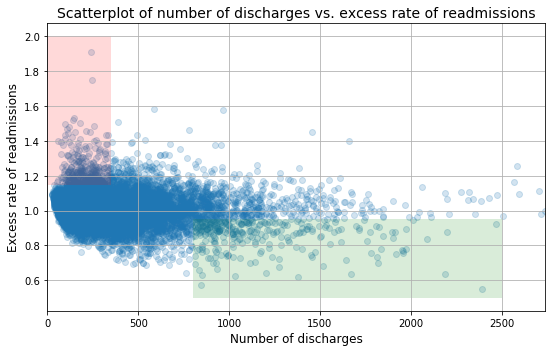

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout();

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['Discharges', 'Ratio']

In [7]:
df.reset_index(drop=True);
df.Discharges = df.Discharges.astype(int);

In [8]:
df.describe()

,Discharges,Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Discharges    11497 non-null int64
Ratio         11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


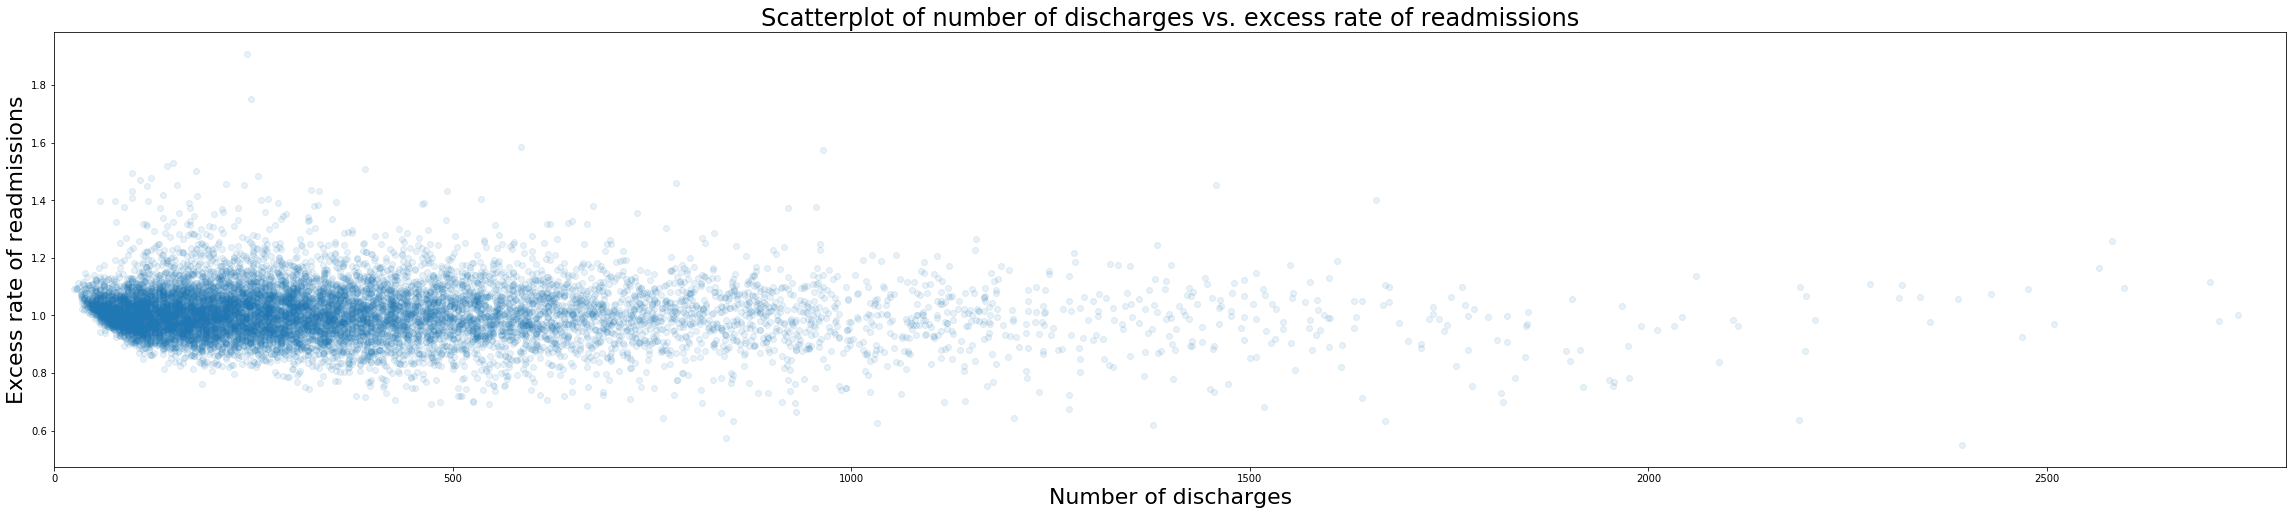

In [10]:
plt.figure(figsize=(40,8))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(0,2800)
plt.xlabel('# discharges', fontsize=22)
plt.ylabel('rate of readmissions', fontsize=22)
plt.title('# Discharges vs. Excess Rate of Readmissions', fontsize=24)

plt.show();

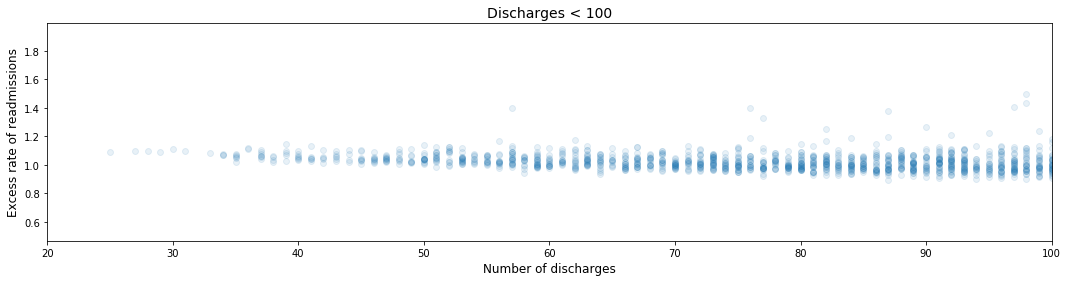

In [11]:
plt.figure(figsize=(18,4))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(20,100)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
plt.title('Small Hospitals: # Discharges v. Rate of Readmissions', fontsize=14)

plt.show();

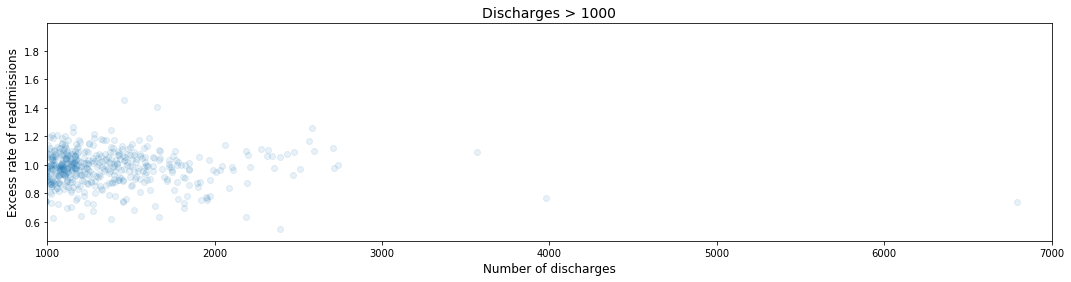

In [12]:
plt.figure(figsize=(18,4))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(1000,7000)
plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
plt.title('Large Hospitals: # Discharges v. Rate of Readmissions', fontsize=14)
plt.show();

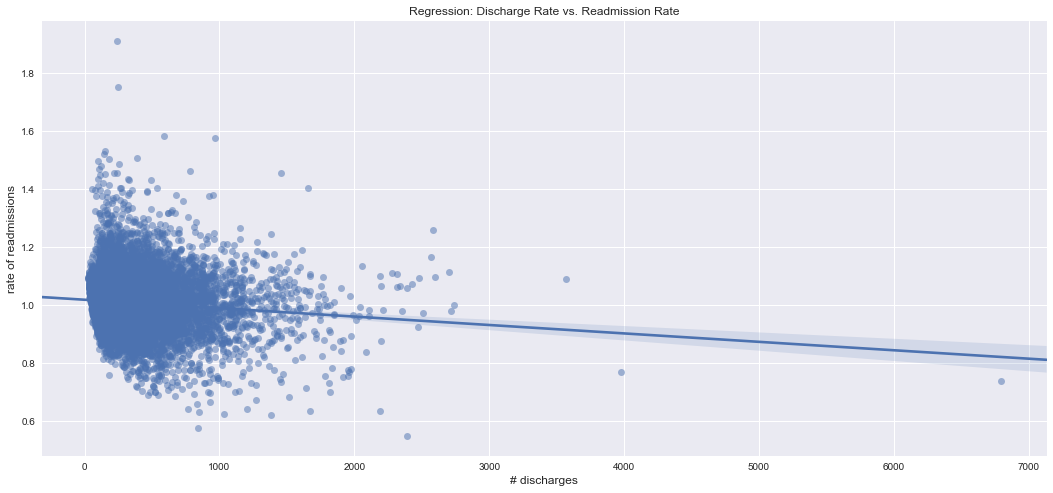

In [24]:
# number of discharges v. rate of readmission for all hospitals

sns.set(rc={'figure.figsize':(18,8)})

ax = sns.regplot(x='Discharges', y='Ratio', data=df, scatter_kws={'alpha':0.5})

plt.xlabel('# discharges', fontsize=12)
plt.ylabel('rate of readmissions', fontsize=12)
ax.set_title('Regression: Discharge Rate vs. Readmission Rate');

In [15]:
# small hospitals: < 100 discharges

small_hospitals = df[df.Discharges<100]
small_hospitals.describe()

,Discharges,Ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


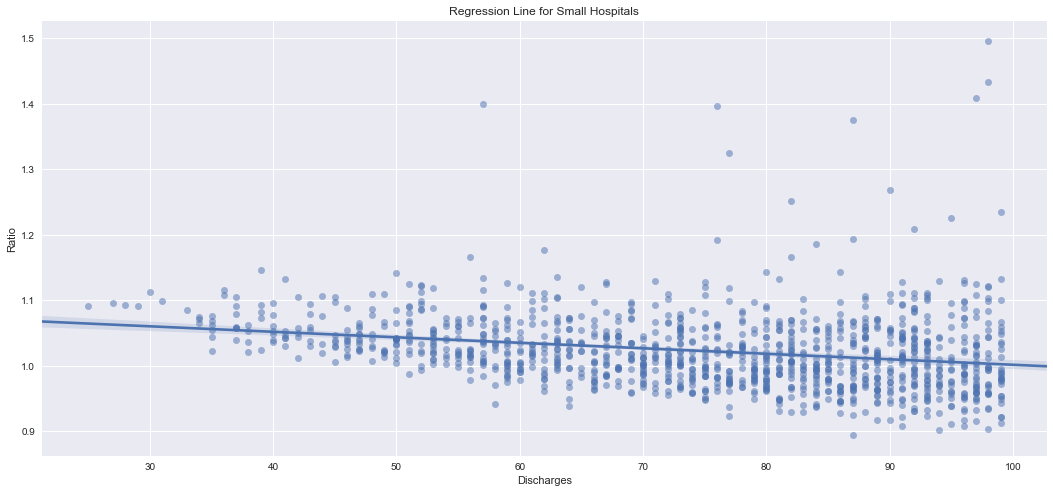

In [19]:
# number of discharges v. rate of readmission for small hospitals

ax = sns.regplot(x='Discharges', y='Ratio', data=small_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line for Small Hospitals');

In [20]:
# large hospitals: > 1.000 discharges

large_hospitals = df[(df.Discharges>1000)]

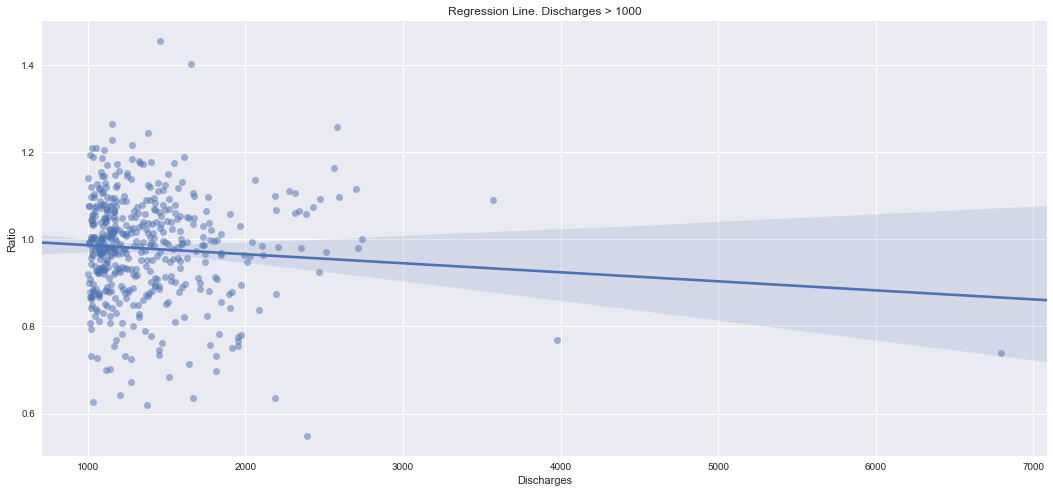

In [22]:
# number of discharges v. rate of readmission for large hospitals

ax = sns.regplot(x='Discharges', y='Ratio', data=large_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges > 1000');

In [31]:
# calculate means for both groups
sm = stats.trim_mean(small_hospitals.Ratio, 0.05)
lg = stats.trim_mean(large_hospitals.Ratio, 0.05)

diff = sm - lg

print('Trimmed Mean\nSmall Hospitals: {}\nLarge Hospitals: {}\n\nDifference: {}'.format(sm, lg, diff))

Trimmed Mean
Small Hospitals: 1.019378598130841
Large Hospitals: 0.9806880095923262

Difference: 0.038690588538514814


__Q: Do you agree with the above analysis and recommendations? Why or why not?__

<div class="alert alert-block alert-success"><h4>Analysis:</h4>  

-9% correlation - some correlation of a to b.  very low, but still statistically sign.

first P is all stats business
second P I can express my opinions

The analysis appears to be correct, but I disagree with the recommendation to require consolidation of smaller facilities into larger facilities.  Further cost-benefit analysis is required, but it looks as though the drop in the readmission rate, while real and statistically significant, may not have a sufficient practical significance to warrant the recommendations to upgrade smaller facilities and consolidate into larger facilities.  The threshold ratio for the readmission rate to be deemed is excessive is 1.  The mean of the smallest hospitals' readmission rate is less than 2% above the threshold, and less than 4% above the mean readmission rate of the large hospitals.

In other words, this might be an instance where statistical significance does not mean practical significance; the proposed fix might be orders of magnitude more costly than continuing on the current course.</div>

__Q: Provide support for your arguments and your own recommendations with a statistically sound analysis:__

__Setup an appropriate hypothesis test.__  
<div class="alert alert-block alert-success">
<h4>Analysis:</h4>$H_0$: There is no correlation between the number of discharges and the readmission rate.  
$H_A$: A hospital's readmission rate is correlated with the number of discharges.  

$$H_0: \rho = 0$$
$$H_A: \rho \neq 0$$
</div>

__Q: Compute and report the observed significance value (or p-value).__


In [33]:
# calculate the correlation coefficient

r = np.corrcoef(x=df.Discharges, y=df.Ratio)[0][1]
r

-0.09739794351079353

<div class="alert alert-block alert-success">
<h4>Analysis:</h4>
Pearson's correlation coefficient is very close to 0.  A value of 0 would mean that there is no correlation whatsoever.  We can test hypothesis about a test statistic if we know its expected distribution.  Because our null hypothesis is that there is no correlation and our data are normally distributed, we can use a two-sample t-test with our correlation coefficient as the test statisic.
</div>

__Q: Report statistical significance for $\alpha$ = .01.__

In [39]:
# since 𝛒=0 our formula for test statistic becomes: r * √(n-2)/(1-r**2)
n = len(df.Discharges)
t_stat = r * np.sqrt((n-2)/(1-r**2))

p_value = stats.t.cdf(x=t,df=n-2) * 2
print('t-statistic: {}\np-value for t-statistic: {}'.format(t_stat, p_value))


t-statistic: -10.49238081342336
p-value for t-statistic: 1.2225473776734486e-25


<div class="alert alert-block alert-success">
<h4>Analysis:</h4>

</div>

__Q: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?__

<div class="alert alert-block alert-success">
<h4>Analysis:</h4>

</div>

__Q: Look at the scatterplot above.__  
__- What are the advantages and disadvantages of using this plot to convey information?__  
__- Construct another plot that conveys the same information in a more direct manner.__

<div class="alert alert-block alert-success">
<h4>Analysis:</h4>

</div>